# 07: Combining data from multiple netcdf files

In some cases, people will choose to break down their data into multiple smaller netcdf files that they will publish in a single data collection. There are a number of good reasons to do this.
* The data user can access only the data they are interested in.
* Each file can be simpler with potentially less dimensions and less missing values. Imagine you have 10 depth profiles that all sample a different set of depths. If these profiles were included in a single netcdf file, the file would most likely a single depth dimension and coordinate variable which would need to account for all 10 depth profiles. Alternatively, 10 depth dimensions and coordinate variables could be included.
* Each individual file can be assigned a separate set of global attributes which describe the data more accurately. For example each file could have global attributes for the coordinates and timestamp. If multiple depth profiles are stored in a single file, only the minimum and maximum coordinates and timestamp can be encoded into the global attributes.
* Imagine you are looking for data in a data centre. You want to find depth profiles in a certain area of interest on a map. Files that include a single depth profile will be presented as points on the map. Files that include multiple depth profiles will be presented as a bounding box on a map, and without opening up the file it could be unclear whether the file includes data for your area of interest.

A common reaction to learning that data are divided into multiple files is that extracting the data will involve more work. However, if the files are similar (and they should be if they follow the CF and ACDD conventions) this is not neccessarily the case.

In this notebook we will look at how to combine data from multiple netcdf files into a single object (e.g. dataframe, multi-dimensional array) that you can use.

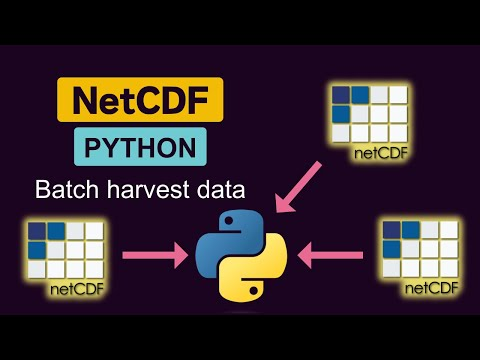

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('AbLRV5YUW2g')

## Introducing the data

The link below is an OPeNDAP access point to CTD data collected as part of the Nansen Legacy data. The data are grouped together by cruise and each CF-NetCDF file contains data from a single depth profile.
https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/

Each file has it's own access point like this
https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_ISG_SVR1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc.html

And anyone can download some or all of the data from the CF-NetCDF file into ASCII files. This makes data access a lot easier for people who don't yet know how to work with NetCDF files.

We can load into Python by removing the *.html* suffix and including the rest of the URL as our filepath. You don't have to download the data!

In [2]:
import xarray as xr

xrds = xr.open_dataset('https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_ISG_SVR1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc')
xrds

<xarray.Dataset>
Dimensions:        (PRES: 259)
Coordinates:
  * PRES           (PRES) float32 2.0 3.0 4.0 5.0 ... 257.0 258.0 259.0 260.0
Data variables: (12/33)
    PRES_QC        (PRES) float32 ...
    TEMP           (PRES) float32 ...
    PSAL           (PRES) float32 ...
    FLU2           (PRES) float32 ...
    CNDC           (PRES) float32 ...
    DENS           (PRES) float32 ...
    ...             ...
    OXYOCPVL-1_QC  (PRES) float32 ...
    SPAR_QC        (PRES) float32 ...
    PAR_QC         (PRES) float32 ...
    PSAL-2_QC      (PRES) float32 ...
    TEMP-2_QC      (PRES) float32 ...
    ATTNZS01_QC    (PRES) float32 ...
Attributes: (12/73)
    qc_manual:                       Recommendations for in-situ data Near Re...
    contact:                         datahjelp@hi.no
    distribution_statement:          These data are public and free of charge...
    naming_authority:                no.unis
    license:                         https://creativecommons.org/licenses/by/...
    data_assembly_center:            IMR
    ...                              ...
    geospatial_vertical_resolution:  1 dbar
    pi_email:                        jannes@unis.no
    pi_institution:                  University Centre in Svalbard
    station_name:                    ISG/SVR1
    metadata_link:                   https://doi.org/10.21335/NMDC-2085836005...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5

Let's look at a quick example of how we can extract the data into numpy arrays

In [3]:
temperature = xrds['TEMP'].values
salinity = xrds['PSAL'].values
temperature, salinity

(array([3.226, 3.211, 3.202, 3.205, 3.213, 3.215, 3.21 , 3.215, 3.191,
        3.162, 3.144, 3.118, 3.081, 2.993, 2.913, 2.861, 2.837, 2.826,
        2.809, 2.776, 2.743, 2.703, 2.687, 2.652, 2.587, 2.544, 2.508,
        2.483, 2.472, 2.434, 2.399, 2.355, 2.298, 2.277, 2.252, 2.225,
        2.201, 2.173, 2.113, 2.073, 2.06 , 2.04 , 2.022, 2.006, 2.004,
        2.008, 2.067, 2.126, 2.145, 2.143, 2.248, 2.288, 2.232, 2.212,
        2.136, 1.997, 1.748, 1.594, 1.657, 1.623, 1.468, 1.385, 1.374,
        1.383, 1.378, 1.38 , 1.367, 1.351, 1.38 , 1.376, 1.391, 1.396,
        1.403, 1.398, 1.413, 1.393, 1.371, 1.248, 1.159, 1.063, 0.997,
        0.981, 0.944, 0.933, 0.928, 0.964, 1.   , 1.013, 1.044, 1.095,
        1.241, 1.216, 1.154, 1.281, 1.362, 1.4  , 1.378, 1.353, 1.237,
        1.069, 0.993, 0.989, 1.048, 1.078, 1.07 , 1.05 , 1.016, 0.946,
        0.928, 0.984, 1.004, 0.942, 0.892, 0.828, 0.691, 0.641, 0.635,
        0.632, 0.625, 0.615, 0.566, 0.542, 0.518, 0.493, 0.52 , 0.457,
      

Or into a pandas dataframe that we can export as a CSV or XLSX file for example

In [4]:
df = xrds[['TEMP','PSAL']].to_dataframe()
#df.to_csv('/path/to/file.csv')
df

,TEMP,PSAL
PRES,,
2.0,3.226,34.233002
3.0,3.211,34.240002
4.0,3.202,34.243000
5.0,3.205,34.240002
6.0,3.213,34.238998
...,...,...
256.0,2.302,34.820999
257.0,2.268,34.820999
258.0,2.221,34.816002


## Looping through multiple files

Now let's look at how we can easily loop through all files (depth profiles) from one cruise

In [5]:
from siphon.catalog import TDSCatalog

base_url = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708'

# Path to the catalog we can loop through
catalog_url = base_url + '/catalog.xml'

# Access the THREDDS catalog
catalog = TDSCatalog(catalog_url)

# Traverse through the catalog and print a list of the NetCDF files
catalog.datasets

['CTD_station_ISG_SVR1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG02_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG02_1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG02_2_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG02_3_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG02_4_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG02_5_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG03_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG05_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG05_01_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG05_02_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG06_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG06_01_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc', 'CTD_station_NLEG06_02_-_Nansen_Legacy_Cru

Now let's loop through this list and open each file in turn and print *time_coverage_start* attribute.

In [6]:
base_url = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708'
catalog_url = base_url + '/catalog.xml'
catalog = TDSCatalog(catalog_url)

for dataset in catalog.datasets:
    profile_url = base_url + '/' + dataset
    xrds = xr.open_dataset(profile_url)
    print(xrds.attrs['time_coverage_start'])
    

2021-07-12T19:05:04Z
2021-07-14T23:59:51Z
2021-07-15T02:01:30Z
2021-07-15T03:35:31Z
2021-07-15T04:45:26Z
2021-07-15T05:55:33Z
2021-07-15T07:25:12Z
2021-07-15T08:44:11Z
2021-07-16T17:22:02Z
2021-07-16T20:34:00Z
2021-07-16T21:18:06Z
2021-07-16T22:07:07Z
2021-07-16T23:09:27Z
2021-07-16T23:56:54Z
2021-07-17T15:14:44Z
2021-07-17T16:43:03Z
2021-07-17T18:32:20Z
2021-07-17T22:19:12Z
2021-07-18T00:28:46Z
2021-07-18T02:17:32Z
2021-07-18T04:17:28Z
2021-07-18T20:15:32Z
2021-07-18T21:27:45Z
2021-07-18T22:40:02Z
2021-07-21T02:48:25Z
2021-07-21T09:48:37Z
2021-07-21T11:44:35Z
2021-07-21T12:42:50Z
2021-07-21T13:27:51Z
2021-07-21T14:14:05Z
2021-07-21T15:54:37Z
2021-07-23T11:17:50Z
2021-07-23T13:34:06Z
2021-07-23T17:07:27Z
2021-07-14T08:14:43Z
2021-07-14T11:15:08Z
2021-07-14T19:56:03Z
2021-07-15T12:31:06Z
2021-07-15T17:10:07Z
2021-07-16T07:17:43Z
2021-07-16T10:32:25Z
2021-07-17T01:30:20Z
2021-07-17T06:00:16Z
2021-07-17T10:37:39Z
2021-07-17T11:38:06Z
2021-07-17T12:46:15Z
2021-07-18T08:52:44Z
2021-07-18T10

## Combining data from all the files into a CSV or XLSX file

In [7]:
import pandas as pd
base_url = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708'
catalog_url = base_url + '/catalog.xml'
catalog = TDSCatalog(catalog_url)

# Initialize an empty list to store individual DataFrames
dataframes_list = []

for dataset in catalog.datasets:
    profile_url = base_url + '/' + dataset
    xrds = xr.open_dataset(profile_url)
    profile_df = xrds[['TEMP','PSAL']].to_dataframe()
    
    # Let's add some more columns from the global attributes that will help
    profile_df['latitude'] = xrds.attrs['geospatial_lat_min']
    profile_df['longitude'] = xrds.attrs['geospatial_lon_min']
    profile_df['timestamp'] = xrds.attrs['time_coverage_start']
    
    # Append the current DataFrame to the list
    dataframes_list.append(profile_df)

# Concatenate all DataFrames in the list into a master DataFrame
master_df = pd.concat(dataframes_list)

# Reset index of the master DataFrame
master_df.reset_index(inplace=True)

master_df

#master_df.to_csv('/path/to/file.csv', index=False)
#master_df.to_excel('/path/to/file.csv', index=False)  # Set index=False to exclude the index from being written to the Excel file

,PRES,TEMP,PSAL,latitude,longitude,timestamp
0,2.0,3.226,34.233002,78.128197,14.0032,2021-07-12T19:05:04Z
1,3.0,3.211,34.240002,78.128197,14.0032,2021-07-12T19:05:04Z
2,4.0,3.202,34.243000,78.128197,14.0032,2021-07-12T19:05:04Z
3,5.0,3.205,34.240002,78.128197,14.0032,2021-07-12T19:05:04Z
4,6.0,3.213,34.238998,78.128197,14.0032,2021-07-12T19:05:04Z
...,...,...,...,...,...,...
32028,3362.0,-0.722,34.945000,82.003799,30.0427,2021-07-25T03:02:53Z
32029,3363.0,-0.722,34.945000,82.003799,30.0427,2021-07-25T03:02:53Z
32030,3364.0,-0.722,34.945000,82.003799,30.0427,2021-07-25T03:02:53Z
32031,3365.0,-0.722,34.945000,82.003799,30.0427,2021-07-25T03:02:53Z


Or maybe you prefer to have separate columns for each depth profile. Let's create a dataframe with one pressure column and individual columns for the temperature data from each profile.

In [8]:
# Create an empty dictionary to store profile data
profile_data = {}

for dataset in catalog.datasets:
    profile_url = base_url + '/' + dataset
    xrds = xr.open_dataset(profile_url)
    
    timestamp = xrds.attrs['time_coverage_start']
    
    profile_data[timestamp] = xrds['TEMP'].to_dataframe()['TEMP']

# Creating a dataframe that includes all profiles
master_df = pd.DataFrame(profile_data.values()).transpose()

# Assigning the timestamps as column headers (currently TEMP for all)
master_df.columns = profile_data.keys()

# Display theb resulting DataFrame
master_df

,2021-07-12T19:05:04Z,2021-07-14T23:59:51Z,2021-07-15T02:01:30Z,2021-07-15T03:35:31Z,2021-07-15T04:45:26Z,2021-07-15T05:55:33Z,2021-07-15T07:25:12Z,2021-07-15T08:44:11Z,2021-07-16T17:22:02Z,2021-07-16T20:34:00Z,...,2021-07-19T14:29:47Z,2021-07-20T13:58:18Z,2021-07-20T19:58:26Z,2021-07-21T17:35:04Z,2021-07-22T13:57:51Z,2021-07-23T06:12:20Z,2021-07-23T09:25:55Z,2021-07-24T01:04:37Z,2021-07-24T14:31:40Z,2021-07-25T03:02:53Z
PRES,,,,,,,,,,,,,,,,,,,,,
2.0,3.226,3.782,3.035,2.504,1.960,1.735,1.694,1.966,NaN,1.382,...,NaN,8.814,NaN,-1.551,-1.582,-1.535,-1.528,NaN,-1.620,-1.643
3.0,3.211,3.783,3.036,2.456,1.960,1.736,1.693,1.958,0.693,1.376,...,-1.499,5.513,NaN,-1.560,-1.585,-1.541,-1.524,NaN,-1.630,-1.643
4.0,3.202,3.783,3.036,2.456,1.950,1.735,1.691,1.954,0.662,1.362,...,-1.498,2.829,NaN,-1.554,-1.588,-1.542,-1.547,NaN,-1.632,-1.641
5.0,3.205,3.783,3.037,2.440,1.956,1.732,1.696,1.973,0.677,1.243,...,-1.497,0.875,-0.452,-1.552,-1.588,-1.549,-1.550,1.913,-1.632,-1.639
6.0,3.213,3.792,3.035,2.443,1.961,1.733,1.695,1.976,0.708,1.359,...,-1.499,1.871,-0.176,-1.552,-1.588,-1.550,-1.550,2.181,-1.627,-1.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.719,NaN,-0.722
3367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.719,NaN,NaN
3368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.719,NaN,NaN


Maybe you want the coordinates as well as the timestamp in the column headers.

In [9]:
import pandas as pd
import xarray as xr
from siphon.catalog import TDSCatalog

base_url = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708'
catalog_url = base_url + '/catalog.xml'
catalog = TDSCatalog(catalog_url)

# Create an empty dictionary to store profile data
profile_data = {}

for dataset in catalog.datasets:
    profile_url = base_url + '/' + dataset
    xrds = xr.open_dataset(profile_url)
    
    timestamp = xrds.attrs['time_coverage_start']
    latitude = xrds.attrs['geospatial_lat_min']
    longitude = xrds.attrs['geospatial_lon_min']
    
    key = (timestamp, latitude, longitude)
    profile_data[key] = xrds['TEMP'].to_dataframe()['TEMP']

# Create a MultiIndex DataFrame
index = pd.MultiIndex.from_tuples(profile_data.keys(), names=['timestamp', 'latitude', 'longitude'])
master_df = pd.DataFrame(profile_data.values(), index=index).transpose()

# Display the resulting DataFrame
master_df

timestamp,2021-07-12T19:05:04Z,2021-07-14T23:59:51Z,2021-07-15T02:01:30Z,2021-07-15T03:35:31Z,2021-07-15T04:45:26Z,2021-07-15T05:55:33Z,2021-07-15T07:25:12Z,2021-07-15T08:44:11Z,2021-07-16T17:22:02Z,2021-07-16T20:34:00Z,...,2021-07-19T14:29:47Z,2021-07-20T13:58:18Z,2021-07-20T19:58:26Z,2021-07-21T17:35:04Z,2021-07-22T13:57:51Z,2021-07-23T06:12:20Z,2021-07-23T09:25:55Z,2021-07-24T01:04:37Z,2021-07-24T14:31:40Z,2021-07-25T03:02:53Z
latitude,78.128197,76.499802,76.595802,76.693001,76.764503,76.812202,76.914703,77.000198,78.000000,78.400002,...,80.512199,80.480003,80.732498,81.547798,81.546700,81.542503,81.542702,82.000999,81.981697,82.003799
longitude,14.003200,31.219801,31.756800,32.303699,32.617298,32.897999,33.516300,34.002300,33.999699,33.999802,...,33.814499,33.202499,33.121498,30.858700,30.795000,30.891500,30.846001,29.982201,29.979000,30.042700
PRES,,,,,,,,,,,,,,,,,,,,,
2.0,3.226,3.782,3.035,2.504,1.960,1.735,1.694,1.966,NaN,1.382,...,NaN,8.814,NaN,-1.551,-1.582,-1.535,-1.528,NaN,-1.620,-1.643
3.0,3.211,3.783,3.036,2.456,1.960,1.736,1.693,1.958,0.693,1.376,...,-1.499,5.513,NaN,-1.560,-1.585,-1.541,-1.524,NaN,-1.630,-1.643
4.0,3.202,3.783,3.036,2.456,1.950,1.735,1.691,1.954,0.662,1.362,...,-1.498,2.829,NaN,-1.554,-1.588,-1.542,-1.547,NaN,-1.632,-1.641
5.0,3.205,3.783,3.037,2.440,1.956,1.732,1.696,1.973,0.677,1.243,...,-1.497,0.875,-0.452,-1.552,-1.588,-1.549,-1.550,1.913,-1.632,-1.639
6.0,3.213,3.792,3.035,2.443,1.961,1.733,1.695,1.976,0.708,1.359,...,-1.499,1.871,-0.176,-1.552,-1.588,-1.550,-1.550,2.181,-1.627,-1.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.719,NaN,-0.722


## Accessing a subset of the files

We can use an if statement within our for loop to work with only certain files. Let's say you are looking for data only within a certain longitude range. You can use select based on the relevant global attribute.

In [10]:
filtered_datasets = {}
for dataset in catalog.datasets:
    profile_url = base_url + '/' + dataset
    xrds = xr.open_dataset(profile_url)
    longitude = xrds.attrs['geospatial_lon_min']
    if 31 < longitude < 31.5:
        filtered_datasets[round(float(xrds.attrs['geospatial_lat_min']),4)] = xrds

## Plotting data from multiple files together

How you do this is going to depend very much on the data and your requirements. However, this is a demonstration that it is possible to create a single plot of data from multiple NetCDF files.

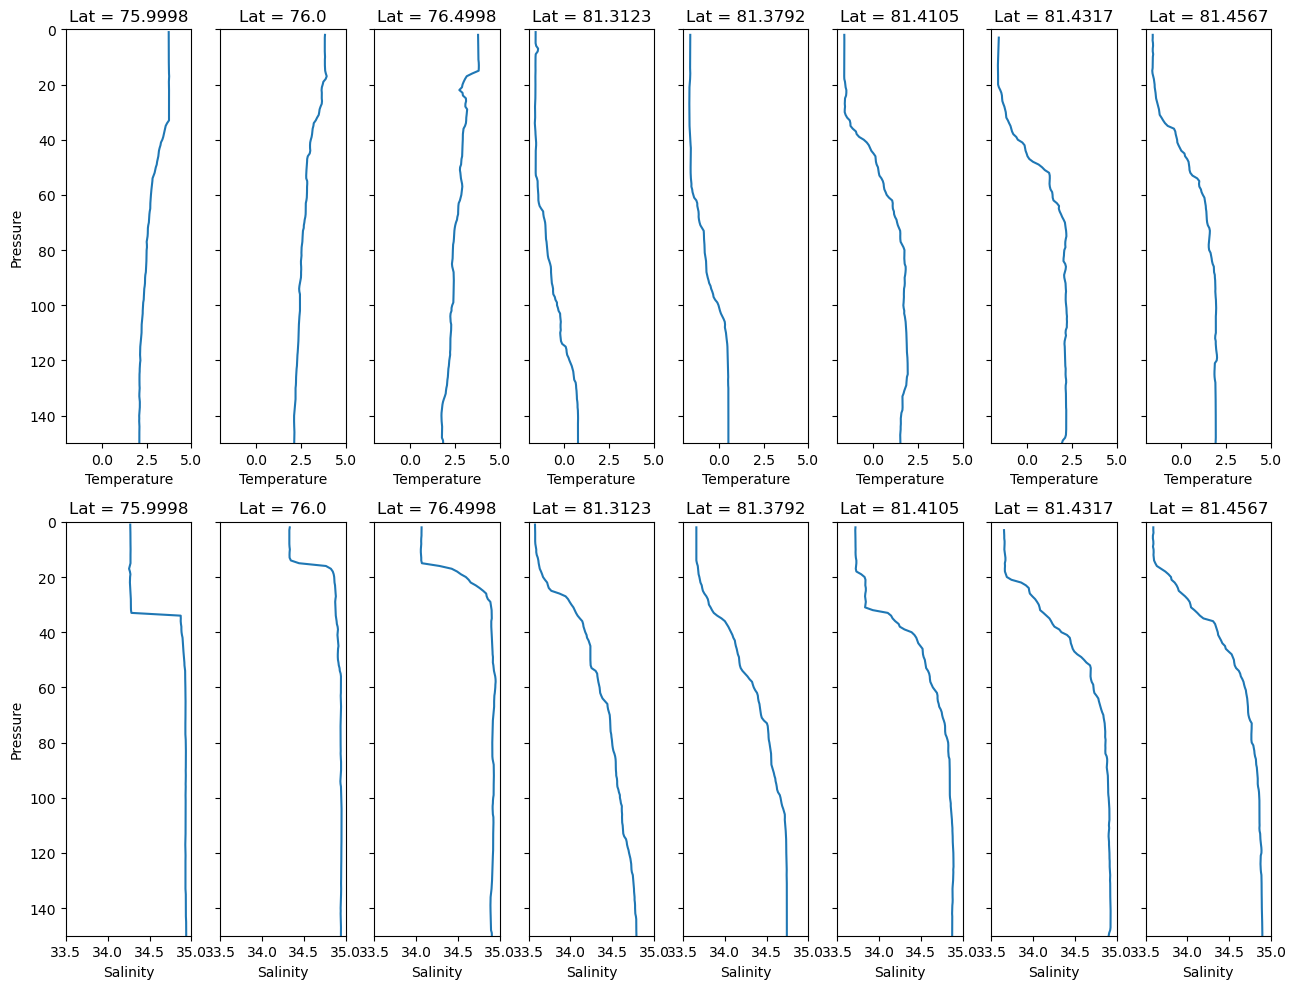

In [11]:
import matplotlib.pyplot as plt
import xarray as xr

fig, axs = plt.subplots(2, len(filtered_datasets), figsize=(13, 10), sharey=True)

# Sorting the datasets in order of latitude
sorted_latitudes = sorted(filtered_datasets.keys())

for i, latitude in enumerate(sorted_latitudes):
    xrds = filtered_datasets[latitude]
    pressure = xrds['PRES']
    temperature = xrds['TEMP']
    salinity = xrds['PSAL']

    axs[0,i].plot(temperature, pressure)
    axs[0,i].set_title(f'Lat = {latitude}')
    axs[0,i].set_ylim([150,0])
    axs[0,i].set_xlim([-2,5])
    axs[0,i].set_xlabel('Temperature')
    if i == 0:
        axs[0,i].set_ylabel('Pressure')

    axs[1,i].plot(salinity, pressure)
    axs[1,i].set_title(f'Lat = {latitude}')
    axs[1,i].set_ylim([150,0])
    axs[1,i].set_xlim([33.5,35])
    axs[1,i].set_xlabel('Salinity')
    if i == 0:
        axs[1,i].set_ylabel('Pressure')

plt.tight_layout()
plt.show()

## How to cite this course

If you think this course contributed to the work you are doing, consider citing it in your list of references. Here is a recommended citation:

Marsden, L. (2024, April 19). NetCDF in Python - from beginner to pro. Zenodo. https://doi.org/10.5281/zenodo.10997447

And you can navigate to the publication and export the citation in different styles and formats by clicking the icon below.

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.10997447.svg)](https://doi.org/10.5281/zenodo.10997447)